# Lab 2 Lab | Feature engineering

Lab instructions can be found [here](https://github.com/ironhack-labs/lab-feature-engineering)

Check for null values in the numerical columns.

In [84]:
numerical_null = pd.DataFrame(numerical.isna().sum()).reset_index()
numerical_null.columns = ['column_name', 'nulls']
numerical_null[numerical_null['nulls']>0]

,column_name,nulls
3,AGE,23665
4,NUMCHLD,83026
6,WEALTH1,44732
8,MBCRAFT,52854
9,MBGARDEN,52854
...,...,...
362,RAMNT_22,74539
363,RAMNT_23,87553
364,RAMNT_24,77674
375,NEXTDATE,9973


Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.

Use appropriate EDA technique where ever necessary.

In [85]:
# let's first check the categorical 
categorical.shape

(95412, 15)

In [86]:
categorical['GEOCODE2'].value_counts(dropna=False)

A      34484
B      28505
D      16580
C      15524
NaN      319
Name: GEOCODE2, dtype: int64

In [87]:
categorical['GEOCODE2'].isna().sum()/len(list(categorical['GEOCODE2']))

0.0033433949608015763

In [88]:
# We can drop the NaNs as there are not many, it doesn't represent much 
categorical = categorical[categorical['GEOCODE2'].notna()]
categorical['GEOCODE2'].value_counts(dropna=False)

A    34484
B    28505
D    16580
C    15524
Name: GEOCODE2, dtype: int64

In [89]:
# now let's check numerical. 
numerical.shape

(95412, 382)

In [90]:
# Checking Wealth 
numerical['WEALTH1'].value_counts(dropna=False)

NaN    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64

In [91]:
numerical['WEALTH1'].isna().sum()/len(list(numerical['WEALTH1']))

0.4688299165723389

In [92]:
# checking ADI 
numerical['ADI'].value_counts(dropna=False)

13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: ADI, Length: 205, dtype: int64

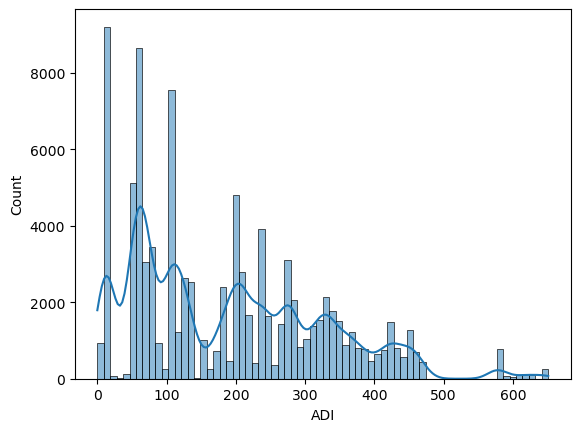

In [93]:
sns.histplot(numerical[numerical['ADI'].isna()==False]['ADI'],kde=True) 
plt.show()

In [95]:
# The null values are quite high, and the data is quite unbalanced. 
# Although there does seem to be a pattern at various thresholds. 
# Maybe a qcut could work as that would categorise the data into bins of similar size.


# Let's first deal with the null values.
# We can impute the null values with the median as the data is skewed. 
numerical['ADI'] = numerical['ADI'].fillna(np.median(numerical['ADI']))

# We can see that there are about 7 bumps in the data where the pattern repeats. Let's set that as the bins for qcut.
num_bins = 7
numerical['ADI_bins'] = pd.qcut(numerical['ADI'], q=num_bins)
print(numerical['ADI_bins'].value_counts())


(-0.001, 51.0]    14991
(271.0, 351.0]    14250
(51.0, 75.0]      13763
(201.0, 271.0]    13599
(75.0, 127.0]     13476
(127.0, 201.0]    12628
(351.0, 651.0]    12573
Name: ADI_bins, dtype: int64


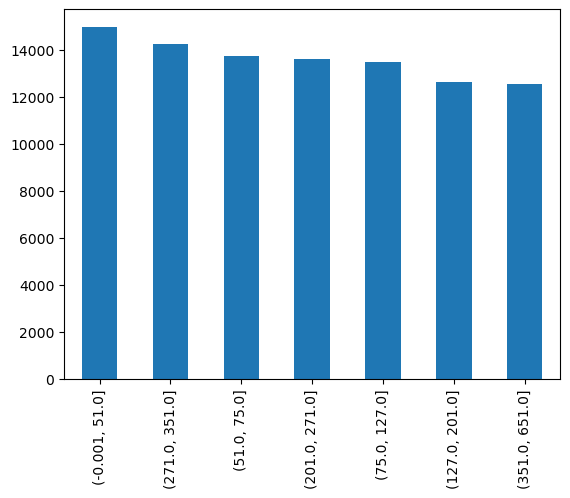

In [96]:
numerical['ADI_bins'].value_counts().plot(kind='bar')
plt.show()

In [97]:
# checking DMA
numerical['DMA'].value_counts(dropna=False)

803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: DMA, Length: 207, dtype: int64

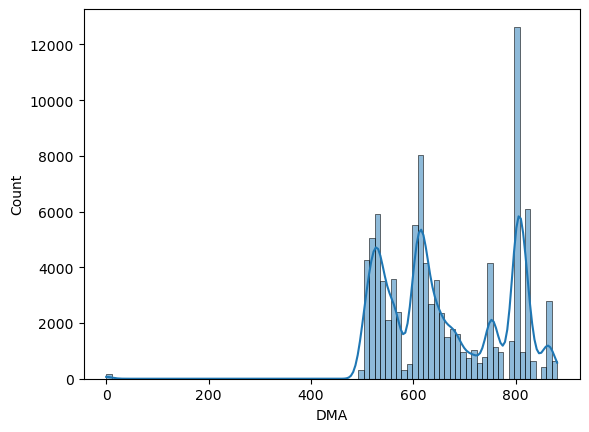

In [98]:
sns.histplot(numerical[numerical['DMA'].isna()==False]['DMA'],kde=True) 
plt.show()

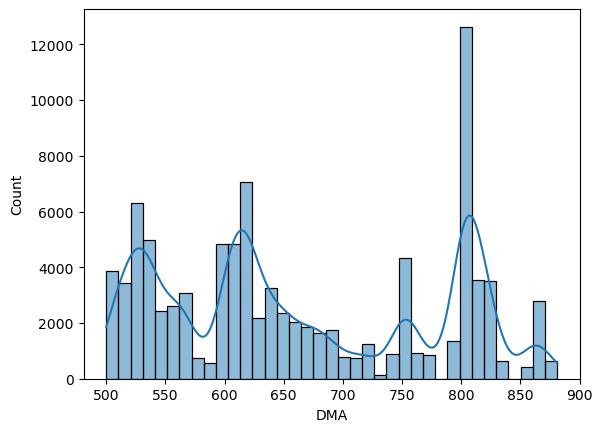

In [102]:
# The values of 0 are low, let's drop them 
numerical = numerical[numerical['DMA']!=0]
# what's the distribution like now?
sns.histplot(numerical[numerical['DMA'].isna()==False]['DMA'],kde=True)
plt.show()

In [ ]:
# We could apply another qcut here, but the distribution seems fair

In [103]:
# checking MSA
numerical['MSA'].value_counts(dropna=False)

0.0       21146
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: MSA, Length: 299, dtype: int64

In [105]:
numerical['MSA'].isnull().sum()/len(list(numerical['MSA']))

0.0013861906012076662

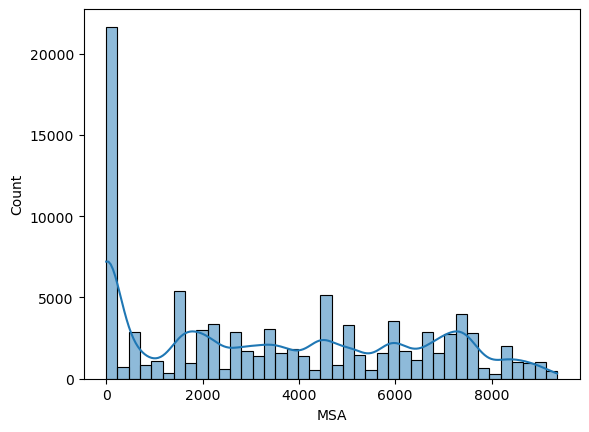

In [106]:
sns.histplot(numerical[numerical['MSA'].isna()==False]['MSA'],kde=True) 
plt.show()

In [ ]:
# The values of 0 are high, we'll use the median to impute the null values
numerical['MSA'] = numerical['MSA'].fillna(np.median(numerical['MSA']))

# End of Lab -----